In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd

Using TensorFlow backend.


In [2]:
numpy.random.seed(2)


In [3]:
dataset = pd.read_csv("datafile.csv", delimiter=",",header=None).iloc[:,:].values

In [4]:
dataset

array([['JAN', 'FEB', 'MAR', ..., 'DEC', 'ANNUAL', 'FLOOD'],
       ['49.2', '87.1', '29.2', ..., '33.6', '3373.2', '1'],
       ['0', '159.8', '12.2', ..., '160.5', '3520.7', '1'],
       ...,
       ['53.2', '16.1', '4.4', ..., '62.3', '1395', '0'],
       ['2.2', '0.5', '3.7', ..., '159', '1642.9', '0'],
       ['59.6', '12.1', '3.2', ..., '74.7', '1065.7', '0']], dtype=object)

In [5]:
feature_cols = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']
X = dataset[1:,1:] # Features
Y = dataset[1:,0] # Target variable
X.shape

(4187, 13)

In [6]:

# split X, Y into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(15, input_dim=13, activation='relu')) # input layer requires input_dim param
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
history=model.fit(x_train, y_train, epochs = 100, batch_size=20, validation_data=(x_test, y_test))

# save the model
model.save('weights.h5')

Train on 3768 samples, validate on 419 samples
Epoch 1/100
3768/3768 [==============================] - 2s 457us/step - loss: -5381.0066 - accuracy: 0.0390 - val_loss: -33431.7646 - val_accuracy: 0.0095
Epoch 2/100
3768/3768 [==============================] - 1s 153us/step - loss: -279685.9742 - accuracy: 0.0109 - val_loss: -976405.6135 - val_accuracy: 0.0095
Epoch 3/100
3768/3768 [==============================] - 1s 157us/step - loss: -2303842.8188 - accuracy: 0.0093 - val_loss: -5800503.6372 - val_accuracy: 0.0095
Epoch 4/100
3768/3768 [==============================] - 1s 155us/step - loss: -10139210.8511 - accuracy: 0.0093 - val_loss: -21030957.6635 - val_accuracy: 0.0095
Epoch 5/100
3768/3768 [==============================] - 1s 154us/step - loss: -29607611.7211 - accuracy: 0.0093 - val_loss: -56812168.7637 - val_accuracy: 0.0095
Epoch 6/100
3768/3768 [==============================] - 1s 154us/step - loss: -71464632.0415 - accuracy: 0.0093 - val_loss: -125355206.5680 - val_accu

3768/3768 [==============================] - 1s 300us/step - loss: -145372026856.0849 - accuracy: 0.0093 - val_loss: -180599223513.5084 - val_accuracy: 0.0095
Epoch 50/100
3768/3768 [==============================] - 1s 296us/step - loss: -153353983954.3440 - accuracy: 0.0093 - val_loss: -192399842487.2935 - val_accuracy: 0.0095
Epoch 51/100
3768/3768 [==============================] - 1s 296us/step - loss: -160570167991.7113 - accuracy: 0.0093 - val_loss: -204463579116.4487 - val_accuracy: 0.0095
Epoch 52/100
3768/3768 [==============================] - 1s 298us/step - loss: -171939068908.4331 - accuracy: 0.0093 - val_loss: -217303871126.3007 - val_accuracy: 0.0095
Epoch 53/100
3768/3768 [==============================] - 1s 297us/step - loss: -179189632965.2993 - accuracy: 0.0093 - val_loss: -230690440771.2076 - val_accuracy: 0.0095
Epoch 54/100
3768/3768 [==============================] - 1s 297us/step - loss: -192747320591.7622 - accuracy: 0.0093 - val_loss: -244709386831.4272 - va

3768/3768 [==============================] - 1s 293us/step - loss: -1249737178649.0022 - accuracy: 0.0093 - val_loss: -1565740793464.9736 - val_accuracy: 0.0095
Epoch 97/100
3768/3768 [==============================] - 1s 258us/step - loss: -1286248417806.1316 - accuracy: 0.0093 - val_loss: -1618678952551.8665 - val_accuracy: 0.0095
Epoch 98/100
3768/3768 [==============================] - 1s 259us/step - loss: -1364506337401.7495 - accuracy: 0.0093 - val_loss: -1675005956770.5203 - val_accuracy: 0.0095
Epoch 99/100
3768/3768 [==============================] - 1s 259us/step - loss: -1411423622050.5137 - accuracy: 0.0093 - val_loss: -1731869307613.1743 - val_accuracy: 0.0095
Epoch 100/100
3768/3768 [==============================] - 1s 303us/step - loss: -1454240045382.1147 - accuracy: 0.0093 - val_loss: -1790821704325.1934 - val_accuracy: 0.0095


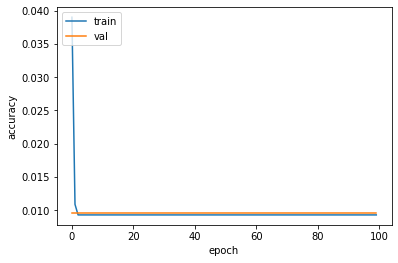

<Figure size 432x288 with 0 Axes>

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('luckyfit'+'.png')
